In [54]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [55]:
temps = pd.read_csv("Data/city_temperature.csv")

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
temps.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [57]:
temps["Region"].value_counts()

North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [58]:
# Take a slice of the data to reduce size of working data
tx_temps = temps[temps["State"] == "Texas"]
print(tx_temps.shape)
tx_temps.head()

(129711, 8)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2630854,North America,US,Texas,Abilene,1,1,1995,33.4
2630855,North America,US,Texas,Abilene,1,2,1995,31.1
2630856,North America,US,Texas,Abilene,1,3,1995,33.6
2630857,North America,US,Texas,Abilene,1,4,1995,28.2
2630858,North America,US,Texas,Abilene,1,5,1995,29.5


In [111]:
tx_temps["City"].unique()

array(['Abilene', 'Amarillo', 'Austin', 'Brownsville', 'Corpus Christi',
       'Dallas Ft Worth', 'El Paso', 'Houston', 'Lubbock',
       'Midland Odessa', 'San Angelo', 'San Antonio', 'Waco',
       'Wichita Falls'], dtype=object)

In [112]:
# Reduce dataset to major cities
populous_cities = ["Austin", "Corpus Christi", "Houston", "San Antonio", "Dallas Fort Worth", "El Paso", "Waco"]
print("Before trim: ", tx_temps.shape)
tx_cities = tx_temps[tx_temps["City"].isin(populous_cities)]
print("After trim: ", tx_cities.shape)

Before trim:  (129711, 8)
After trim:  (55590, 8)


In [113]:
# Get average temperature for each month for each major city
city_month_avg_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).mean()["AvgTemperature"].reset_index())
city_month_avg_temp.head(15)

,City,Month,AvgTemperature
0,Austin,1,50.525434
1,Austin,2,54.537687
2,Austin,3,60.949007
3,Austin,4,65.239744
4,Austin,5,75.089340
5,Austin,6,79.883867
6,Austin,7,83.621419
7,Austin,8,83.779097
8,Austin,9,78.529733
9,Austin,10,69.438710


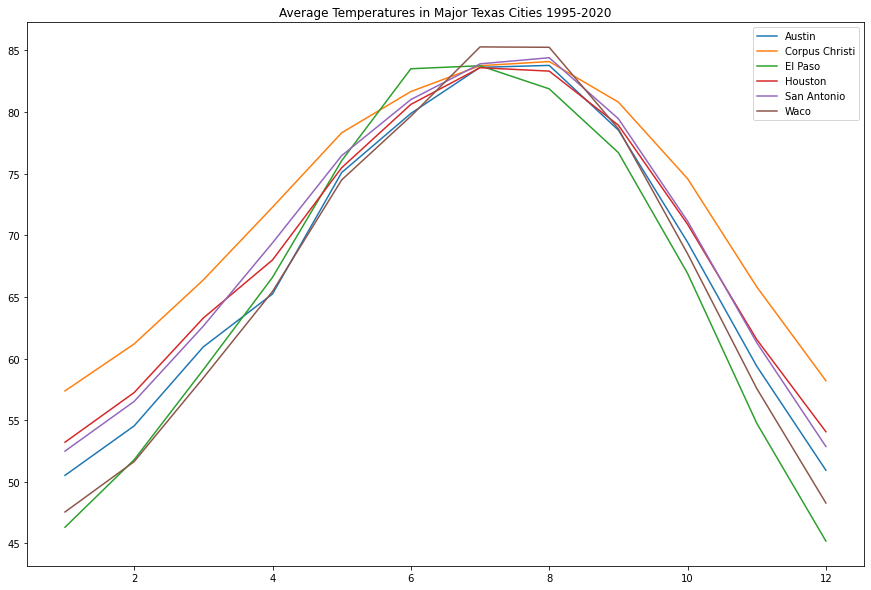

In [124]:
fig, ax = plt.subplots(figsize=(15,10))

for city in city_month_avg_temp["City"].unique():
    plot_df = city_month_avg_temp[city_month_avg_temp["City"] == city]
    ax.plot(plot_df["Month"], plot_df["AvgTemperature"])

ax.legend(city_month_avg_temp["City"].unique())
ax.set(title ="Average Temperatures in Major Texas Cities 1995-2020")
plt.show()

In [110]:
# Check if Corpus Christi has highest December avg temp
city_month_avg_temp[city_month_avg_temp["Month"] == 12].sort_values(by="AvgTemperature", ascending = False)

,City,Month,AvgTemperature
23,Corpus Christi,12,58.201032
47,Houston,12,54.062839
71,San Antonio,12,52.864129
11,Austin,12,50.940645
35,El Paso,12,45.194194
59,Lubbock,12,39.930839
